In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('/content/housing_prices - housing_prices.csv')
df.columns

Index(['SquareFootage', 'Price'], dtype='object')

In [32]:
x = df['SquareFootage'].values.astype(float)
y = df['Price'].values.astype(float)


In [33]:
# Feature scaling

x_mean, x_std = x.mean(), x.std()
y_mean, y_std = y.mean(), y.std()

x_s = (x - x_mean) / x_std
y_s = (y - y_mean) / y_std

m=0
b=0
lr=0.01


epochs = 20000

n = len(x_s)


# Gradient Descent loop

for i in range(epochs):
    y_pred = m * x_s + b
    error = y_pred - y_s

    # derivatives
    dm = (1/n) * np.sum(error * x_s)
    db = (1/n) * np.sum(error)

    # update
    m -= lr * dm
    b -= lr * db

m_real = (m * y_std) / x_std
b_real = (b * y_std) + y_mean - (m_real * x_mean)

print("Slope m =", m_real)
print("Intercept b =", b_real)
pred=m_real*2500 + b_real
print("Predicted price",pred)

Slope m = 171.17327329376084
Intercept b = 1627.3680380271398
Predicted price 429560.55127242923


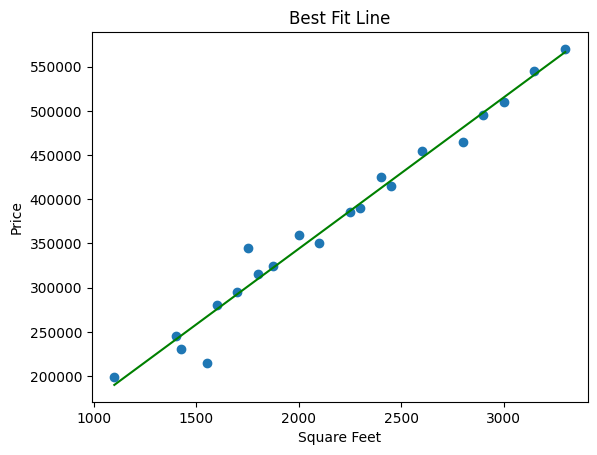

In [34]:
plt.scatter(x, y)
xs = np.linspace(min(x), max(x), 200)
plt.plot(xs, m_real * xs + b_real, color="green")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Best Fit Line")
plt.show()